<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/ANN_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"


In [76]:
import pandas as pd
fish=pd.read_csv(dataset_url,error_bad_lines=False)

In [77]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [78]:
num_species=len(fish['Species'].unique())
print('Number of unique species of fishes:',num_species)

Number of unique species of fishes: 7


In [79]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [92]:
X=fish.drop(columns="Species",axis=1)


In [93]:
Y=fish["Species"]


In [82]:
X.head()


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [94]:
#Label Encoding the target variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(Y)

In [96]:
#Splitting into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [97]:
Y_train

array([2, 3, 0, 2, 4, 4, 1, 2, 0, 3, 5, 2, 1, 4, 2, 0, 2, 2, 2, 0, 2, 1,
       2, 0, 5, 2, 4, 0, 3, 0, 3, 2, 1, 0, 2, 3, 0, 2, 1, 4, 2, 0, 4, 2,
       0, 0, 2, 2, 4, 3, 2, 5, 3, 4, 2, 1, 2, 0, 2, 5, 2, 1, 5, 2, 2, 4,
       0, 2, 2, 4, 4, 2, 2, 0, 4, 0, 4, 1, 2, 2, 2, 2, 3, 3, 2, 0, 2, 0,
       6, 3, 0, 0, 4, 2, 3, 0, 3, 1, 4, 2, 4, 5, 6, 4, 2, 0, 6, 5, 3, 4,
       5, 0, 4, 3, 2, 2, 2, 2, 2, 2, 5, 0, 1, 2, 0, 2, 2])

In [98]:
#Transforming dataset
from sklearn.preprocessing import StandardScaler

In [99]:
sc=StandardScaler()

X_train=sc.fit_transform(X_train)

In [100]:
#Building the model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
#Training the model
clf.fit(X_train,Y_train)

LogisticRegression()

In [101]:
X_test=sc.transform(X_test)

In [102]:
#Predicting the output
y_pred=clf.predict(X_test)
#Computing accuracy of model 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 87.50%


In [103]:
y_pred

array([2, 5, 3, 2, 2, 0, 5, 2, 2, 3, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 5, 0,
       0, 0, 0, 2, 2, 2, 5, 5, 3, 2])

In [ ]:
#Using one hot encoding to build them model

In [37]:
from tensorflow.keras.utils import to_categorical

In [104]:
Y_encoded=to_categorical(Y_train)

In [105]:
Y_encoded[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [48]:
Y_encoded.shape

(159, 7)

In [106]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [107]:
model=Sequential([
                  Dense(units=16,input_shape=(6,),activation='relu'),
                  Dense(units=32,activation='relu'),
                  Dense(units=64,activation='relu'),
                  Dense(units=128,activation='relu'),
                  Dense(units=256,activation='relu'),
                  Dense(units=7,activation='softmax')
])

In [108]:
model.summary(
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                112       
                                                                 
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                                 
 dense_32 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 45,911
Trainable params: 45,911
Non-trai

In [72]:
Y_encoded[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [109]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [110]:
history=model.fit(x=X_train,y=Y_encoded,validation_split=0.1,batch_size=10,epochs=200,shuffle=True,verbose=2)

Epoch 1/200
12/12 - 1s - loss: 1.9676 - accuracy: 0.0702 - val_loss: 1.9542 - val_accuracy: 0.0769 - 760ms/epoch - 63ms/step
Epoch 2/200
12/12 - 0s - loss: 1.9363 - accuracy: 0.0789 - val_loss: 1.9204 - val_accuracy: 0.1538 - 45ms/epoch - 4ms/step
Epoch 3/200
12/12 - 0s - loss: 1.9057 - accuracy: 0.2719 - val_loss: 1.8924 - val_accuracy: 0.6923 - 59ms/epoch - 5ms/step
Epoch 4/200
12/12 - 0s - loss: 1.8780 - accuracy: 0.4912 - val_loss: 1.8611 - val_accuracy: 0.7692 - 48ms/epoch - 4ms/step
Epoch 5/200
12/12 - 0s - loss: 1.8493 - accuracy: 0.5351 - val_loss: 1.8300 - val_accuracy: 0.6923 - 54ms/epoch - 4ms/step
Epoch 6/200
12/12 - 0s - loss: 1.8220 - accuracy: 0.4825 - val_loss: 1.7969 - val_accuracy: 0.6923 - 58ms/epoch - 5ms/step
Epoch 7/200
12/12 - 0s - loss: 1.7890 - accuracy: 0.4825 - val_loss: 1.7591 - val_accuracy: 0.6923 - 51ms/epoch - 4ms/step
Epoch 8/200
12/12 - 0s - loss: 1.7567 - accuracy: 0.4825 - val_loss: 1.7186 - val_accuracy: 0.6923 - 53ms/epoch - 4ms/step
Epoch 9/200
12

In [111]:
loss,accuracy=model.evaluate(X_train,Y_encoded)

4/4 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.9055


In [113]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8793 sha256=0fa918055686ae8affad3eba293cd3446b7b47a1ffa121076f8b7d6f83b78128
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7877 sha256=ecf64431877f90efa67b06120b8e9f81a4367b1c5e61e288a19a1c822301bf25
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=a9a3a7fd659702191d9b97c046dabfdd73c9c70445db7bdcb0eeffde6e83d3eb
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [114]:
from plot_keras_history import show_history, plot_history

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f86e0bcbf50>,
       dtype=object))

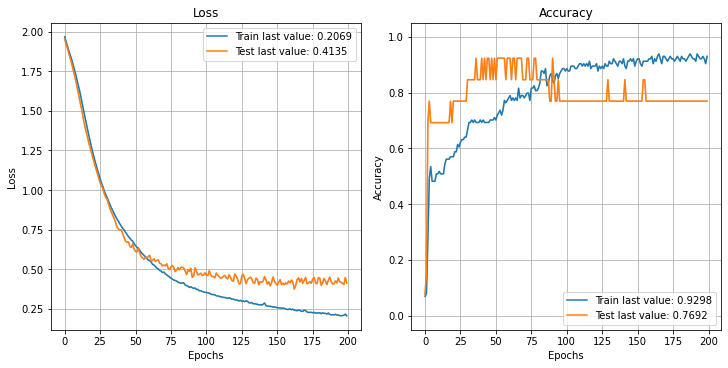

In [115]:
plot_history(history)

In [117]:
predictions=model.predict(X_test)

In [120]:
import numpy as np

In [140]:
np.argmax(predictions[0])
PRED=[]

In [129]:
len(predictions)

32

In [123]:
from sklearn.metrics import accuracy_score

In [147]:
Y_test.shape


(32,)

In [146]:
PRED

[2,
 5,
 3,
 4,
 2,
 0,
 5,
 4,
 2,
 3,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 4,
 0,
 5,
 0,
 0,
 0,
 0,
 2,
 2,
 4,
 5,
 5,
 3,
 2]

In [138]:
d=model.predict(X_test[1:2])

In [139]:
np.argmax(d)

5

In [141]:
for j in range(len(predictions)):
  temp=np.argmax(predictions[j])
  PRED.append(temp)


In [142]:
acc_score=accuracy_score(Y_test,PRED)

In [144]:
acc_scor=acc_score*100

In [145]:
print('The accuracy score for this model is',acc_score)

The accuracy score for this model is 0.875
